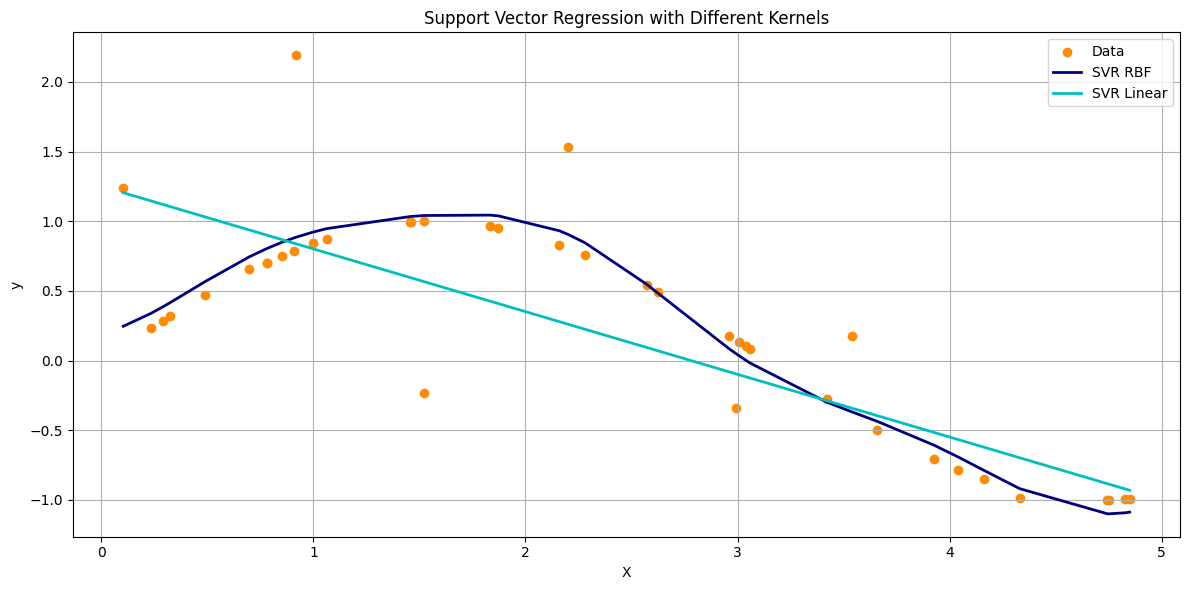

Mean Squared Error (RBF SVR): 0.1346
Mean Squared Error (RBF Lin): 0.2400


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Create toy data
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# Fit Support Vector Regression
svr_rbf = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, epsilon=0.1)
#svr_poly = SVR(kernel='poly', C=100, degree=2, epsilon=0.1, coef0=1)

# Predict
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)

# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='darkorange', label='Data')
plt.plot(X, y_rbf, color='navy', lw=2, label='SVR RBF')
plt.plot(X, y_lin, color='c', lw=2, label='SVR Linear')
#plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='SVR Polynomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression with Different Kernels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Step Compute MSE
mse_rbf = mean_squared_error(y, y_rbf )
mse_lin = mean_squared_error(y, y_lin )
print(f"Mean Squared Error (RBF SVR): {mse_rbf:.4f}")
print(f"Mean Squared Error (RBF Lin): {mse_lin:.4f}")




# Show support vectors for the best model - you can plot for any model

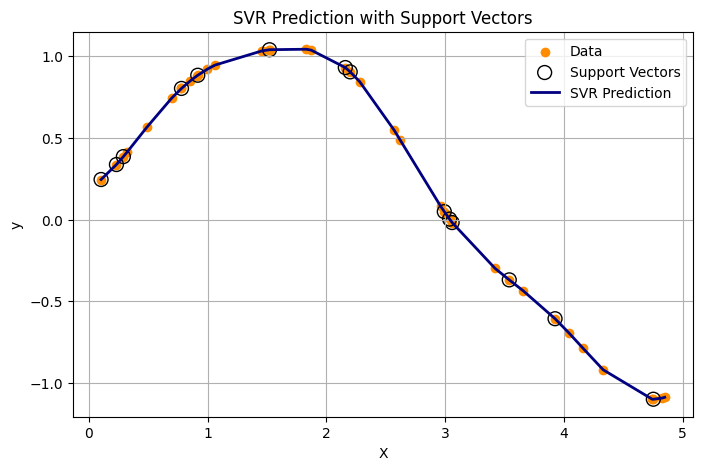

In [5]:
# Plot support vectors
support_indices = svr_rbf.support_
plt.figure(figsize=(8, 5))
plt.scatter(X, y_rbf, color='darkorange', label='Data')
plt.scatter(X[support_indices], y_rbf[support_indices], facecolors='none', edgecolors='k', s=100, label='Support Vectors')
plt.plot(X, y_rbf, color='navy', lw=2, label='SVR Prediction')
plt.xlabel("X")
plt.ylabel("y")
plt.title("SVR Prediction with Support Vectors")
plt.legend()
plt.grid(True)
plt.show()

#Generalization Performance

In [8]:
X_test = np.sort(5 * np.random.rand(20, 1), axis=0)
y_test = np.sin(X_test).ravel()
y_test[::5] += 3 * (0.5 - np.random.rand(4))  # Add noise to every 5th point
# Step 2: Predict on Test Data
y_test_pred = svr_rbf.predict(X_test)

# Step 3: Compute Test MSE
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE RBF (Generalization Error): {test_mse:.4f}")

Test MSE RBF (Generalization Error): 0.1686


In [9]:


# Step 2: Predict on Test Data
y_test_pred = svr_lin.predict(X_test)

# Step 3: Compute Test MSE
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE Linear Model (Generalization Error): {test_mse:.4f}")

Test MSE Linear Model (Generalization Error): 0.2744


## Training by K Fold Cross Validation on Non-Linear Model with the RBF

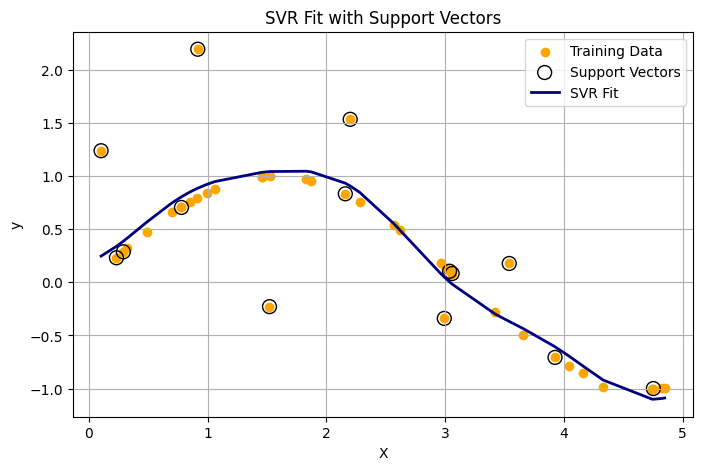

Cross-Validation MSE Scores: [0.17758908 0.48537535 0.35330196 0.10239699 0.03679762]
Mean CV MSE: 0.2311


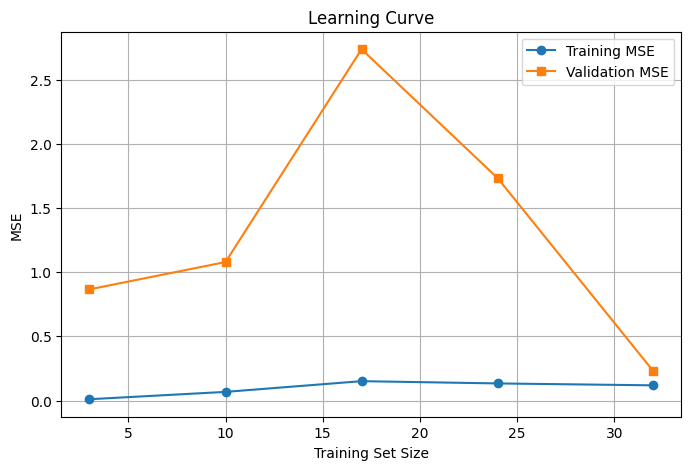

Test MSE (Generalization Error): 0.0481


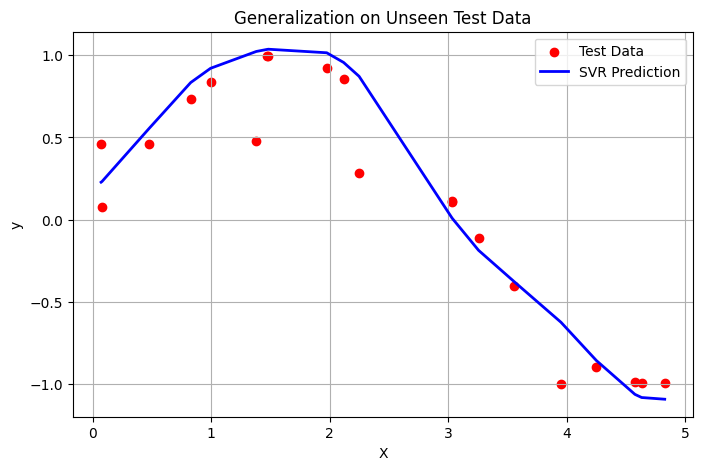

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, learning_curve

def svr_diagnostic_pipeline(C=100, epsilon=0.1, kernel='rbf'):
    # Generate training data
    np.random.seed(42)
    X_train = np.sort(5 * np.random.rand(40, 1), axis=0)
    y_train = np.sin(X_train).ravel()
    y_train[::5] += 3 * (0.5 - np.random.rand(8))  # Add noise

    # Train SVR model
    svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
    svr.fit(X_train, y_train)
    y_train_pred = svr.predict(X_train)

    # Plot training fit and support vectors
    support_indices = svr.support_
    plt.figure(figsize=(8, 5))
    plt.scatter(X_train, y_train, color='orange', label='Training Data')
    plt.scatter(X_train[support_indices], y_train[support_indices], facecolors='none', edgecolors='black', s=100, label='Support Vectors')
    plt.plot(X_train, y_train_pred, color='navy', lw=2, label='SVR Fit')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("SVR Fit with Support Vectors")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Cross-validation
    cv_scores = -cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"Cross-Validation MSE Scores: {cv_scores}")
    print(f"Mean CV MSE: {cv_scores.mean():.4f}")

    # Learning Curve
    train_sizes, train_scores, val_scores = learning_curve(
        svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, -np.mean(train_scores, axis=1), 'o-', label="Training MSE")
    plt.plot(train_sizes, -np.mean(val_scores, axis=1), 's-', label="Validation MSE")
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Generalization: New Test Set
    X_test = np.sort(5 * np.random.rand(20, 1), axis=0)
    y_test = np.sin(X_test).ravel()
    y_test[::5] += 3 * (0.5 - np.random.rand(4))  # Add noise
    y_test_pred = svr.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"Test MSE (Generalization Error): {test_mse:.4f}")

    # Plot Test Predictions
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, color='red', label='Test Data')
    plt.plot(X_test, y_test_pred, color='blue', lw=2, label='SVR Prediction')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Generalization on Unseen Test Data")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
svr_diagnostic_pipeline()


**Inference**

* Avg Cross-Validation MSEs (average over folds): 0.2311

* Test MSE (on new unseen data): 0.0481


-- The model fits the training data well.

-- CV indicates moderate performance across folds.

-- The test error is low, suggesting the model generalizes well on that new set.

*Further Analysis*
You can check: if

- Training MSE: Is it close to test MSE?

- Residual plots: Are errors random (good) or systematic (bad)?

- Repeat with multiple random test sets to verify generalization robustness.



**Note**:  sklearn Uses Negative Scoring for Loss Functions

In scikit-learn, the `cross_val_score` and other evaluation functions are built around the assumption that higher scores are better.

However, many important evaluation metrics in regression and classification are loss functions, where lower values indicate better performance. For example:

- Mean Squared Error (MSE)

- Mean Absolute Error (MAE)

- Log Loss (Cross Entropy) for classification

To reconcile this, scikit-learn uses a naming convention like:
```scoring='neg_mean_squared_error'```

This ensures that:

All scores returned by cross_val_score, GridSearchCV, etc., follow the rule:
higher score = better model

It avoids mixing maximization (e.g., R²) with minimization metrics (e.g., MSE) under the hood.
If you're using:
```
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
```
Then:

-- cv_scores will be negative values.

-- To get the true MSE, simply negate them:
```true_mse = -cv_scores```
